# 重回帰

In [1]:
!pip install japanize-matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

## 重回帰

$\def\bm{\boldsymbol}$これまで、以下のデータ$\mathcal{D}_s$を例として単回帰を説明した。
\begin{align}
\mathcal{D}_s = \left\{(x_i, y_i)\right\}_{i=1}^{4} = \left\{(1, 3), (3, 6), (6, 5), (8, 7)\right\}
\end{align}

また、求めた回帰直線をデータ点とともにプロットしたものを以下に示す。

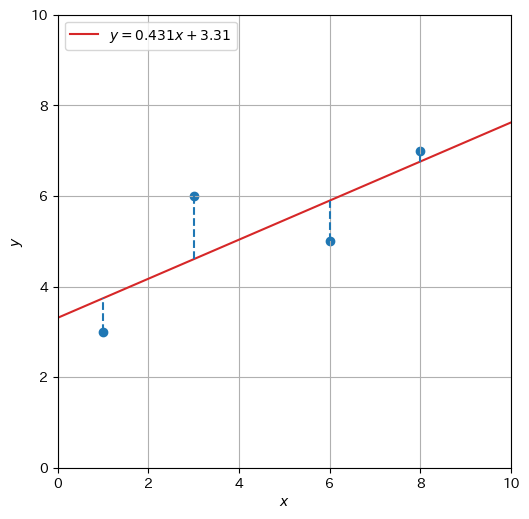

In [3]:
a, b = 0.431, 3.310 
D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])

fig, ax = plt.subplots(dpi=100, figsize=(6, 6))

ax.scatter(D[:,0], D[:,1], marker='o')

x = np.array([0, 10])
ax.plot(x, a * x + b, 'tab:red', ls='-', label=f'$y = {a}x + {b}$')

for i, row in enumerate(D):
    x, y = row
    y_hat = a * x + b
    plt.vlines([x], min(y, y_hat), max(y, y_hat), "tab:blue", linestyles='dashed')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_aspect('equal')
ax.grid()
plt.legend(loc='upper left')
plt.show()

残差の平均二乗和が最小になるような直線を引いたはずであるが、残差を完全に無くすことはできなかった（決定係数を求めてみると$0.616$であり、あまり高くない）。プロットされている点を眺めると、３次関数を当てはめる方が向いているように思われる。そこで、１次関数よりも表現力が高いモデルとして、$d$次の多項式の一般形、
\begin{align}
\hat{y} = w_0 + w_1 x + w_2 x^2 + \dots + w_d x^d
\end{align}
にフィッティングすることを考えたい。ここで、$w_0, w_1, w_2, \dots, w_d \in \mathbb{R}$はモデルの**パラメータ**である。

なお、$\hat{y}$は重み$w_0, w_1, w_2, \dots, w_d$による説明変数$1, x, x^2, \dots x^d$の線形重み付き和と考えることができる。このモデルは多項式の一般形ではあるが、$\hat{y}$は$w_i$と$x^i$の線形結合で表されているため、**線形モデル**と見なすことができる。ただし、説明変数が２個以上であるので、単回帰を重回帰に拡張する必要がある。

一般的に、$d$個の説明変数$x_1, x_2, \dots, x_d$に対して、線形モデル、すなわち$d$個の重み$w_1, w_2, \dots, w_d$の線形結合で目的変数の予測値$\hat{y}$を計算することを**線形回帰**と呼ぶ。
\begin{align}
\hat{y} = w_1 x_1 + w_2 x_2 + \dots + w_d x_d
\end{align}
ゆえに、$(d-1)$次の多項式へのフィッティングは、$d$個の説明変数$x_1 = 1$, $x_2 = x$, $x_3 = x^2$, $\dots$, $x_d = x^{d-1}$による線形回帰と見なすことができる。下図は、重回帰でデータ$\mathcal{D}_s$に３次関数を当てはめた結果である。本章の内容をマスターすると、$4$個の説明変数$1, x, x^2, x^3$に対して、その重み（$-1.23, 5.41, -1.27, 0.09$）を求めることができる。

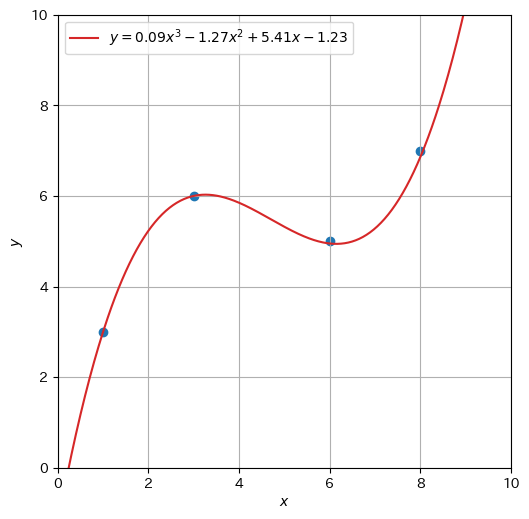

In [5]:
a, b = 0.431, 3.310 
D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])

fig, ax = plt.subplots(dpi=100, figsize=(6, 6))

ax.scatter(D[:,0], D[:,1], marker='o')

x = np.linspace(0, 10, 500)
ax.plot(x, 0.09 * x ** 3 - 1.27 * x ** 2 + 5.41 * x - 1.23, 'tab:red', ls='-', label='$y = 0.09 x^3 - 1.27 x^2 + 5.41 x - 1.23$')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_aspect('equal')
ax.grid()
plt.legend(loc='upper left')
plt.show()

回帰分析において、説明変数を何個用意するか、それぞれの説明変数をどのように定義するかは任意である。たとえば、東京におけるアイスクリームへの支出額を予測するために、最高気温だけでなく、予測したい月の数字やアイスクリームの平均価格も有力な説明変数になり得るかもしれない。また、最高気温の平方根や、最高気温と月の積など、元の説明変数に非線形変換を適用した説明変数を導入してもよい。分析者が非線形変換の方法を明示的に設計する必要があるが、説明変数の組み合わせを考慮した非線形な回帰分析も、線形回帰の枠組みで行うことができる。

![non-linear](fig/non-linear.png "非線形変換を用いた回帰")

## 表記法の定義

```{margin} ベクトル
この資料では、ベクトルを小文字の太字で表す。特に断りがない限り、ベクトルは要素を縦に並べた**列ベクトル**であるとする。例えば、$1, 0, -1$を要素とする$3$次元ベクトル$\bm{v} \in \mathbb{R}^3$を、

$$
\bm{v} = \begin{pmatrix}1 \\ 0 \\ -1\end{pmatrix}
$$

と書く。なお、横書きの文書で列ベクトルを書くとスペースを消費してしまうので、転置の演算子（$\top$）を用いて、

$$
\bm{v} = \begin{pmatrix}1 & 0 & -1\end{pmatrix}^\top
$$

と書くことがある。
```

重回帰の目的関数を一般的に記述するため、ベクトルによる表記を導入する。$d$個の説明変数$x_1, x_2, \dots, x_d$をベクトル$\bm{x} \in \mathbb{R}^d$でまとめて表現する。

\begin{align}
\bm{x} = \begin{pmatrix}
x_1 \\ x_2 \\ \vdots \\ x_d
\end{pmatrix}
\end{align}

また、$d$個のパラメータ（重み）$w_1, w_2, \dots, w_d$をベクトル$\bm{w} \in \mathbb{R}^d$でまとめて表現する。

\begin{align}
\bm{w} = \begin{pmatrix}
w_1 \\ w_2 \\ \vdots \\ w_d
\end{pmatrix}
\end{align}

```{margin} ベクトルの内積

$d$次元ベクトル、

\begin{align*}
\bm{u} &= \begin{pmatrix}u_1 & u_2 & \dots & u_d\end{pmatrix}^\top \\
\bm{v} &= \begin{pmatrix}v_1 & v_2 & \dots & v_d\end{pmatrix}^\top
\end{align*}

があるとき、その内積は、

$$
\bm{u} \cdot \bm{v} = u_1 v_1 + u_2 v_2 + \dots + u_d v_d
$$

である。これは、転置を使って、

\begin{align*}
\bm{u} \cdot \bm{v} &= \bm{u}^\top \bm{v} \\
&= \begin{pmatrix}u_1 & u_2 & \dots & u_d\end{pmatrix} \begin{pmatrix}v_1 \\ v_2 \\ \dots \\ v_d\end{pmatrix}
\end{align*}

と書ける。
```

すると、重回帰モデルによる目的変数の予測値$\hat{y}$は、ベクトル$\bm{x}$と$\bm{w}$の内積として記述できる。

\begin{align}
\hat{y} = \bm{x}^\top\bm{w} = w_1 x_1 + w_2 x_2 + \dots + w_d x_d
\end{align}

単回帰のときと同様に、説明変数と目的変数の組を**事例**として表現する。単回帰の場合と異なるのは、説明変数がスカラー$x$からベクトル$\bm{x}$に拡張されたことである。
$1$番目の事例を$(\bm{x}_1, y_1)$、$2$番目の事例を$(\bm{x}_2, y_2)$、$i$番目の事例を$(\bm{x}_i, y_i)$と表すことにすると、$N$個の事例からなるデータ$\mathcal{D}$は次のように表される。
\begin{align}
\mathcal{D} = \left\{(\bm{x}_1, y_1), (\bm{x}_2, y_2), \dots, (\bm{x}_N, y_N)\right\} = \left\{(\bm{x}_i, y_i)\right\}_{i=1}^{N}
\end{align}

```{margin} 行列

この資料では、行列を大文字の太字で表す。$\bm{X}$が実数値を要素とする$N$行$M$列の行列（$N \times M$の行列とも呼ばれる）であることを、$\bm{X} \in \mathbb{R}^{N \times M}$と書く。行列$\bm{X}$の$i$行$j$列の要素を$X_{i,j}$と表現する。

例えば、$2 \times 3$の行列$\bm{X}$に関して、

\begin{align*}
\bm{X} = \begin{pmatrix}
1 & 3 & 5 \\
6 & 4 & 2 \\
\end{pmatrix}
\end{align*}

$X_{1,2} = 3$、$X_{2,3} = 2$である。
```

さらに、$N$個の事例や目的変数を行列やベクトルで記述する表記法も導入しておく。説明変数のベクトル$\bm{x}_i$を行ベクトルとして縦に$N$個並べた行列$\bm{X} \in \mathbb{R}^{N \times d}$を定義する。この行列$\bm{X}$は**計画行列**（design matrix）と呼ばれ、それぞれの事例の$d$個の説明変数を水平方向に$d$個並べ、$N$個の事例を垂直方向に$N$個並べたものである。

\begin{align}
\bm{X} = \begin{pmatrix}
\bm{x}_1^\top \\
\bm{x}_2^\top \\
\vdots \\
\bm{x}_N^\top \\
\end{pmatrix}
= \begin{pmatrix}
X_{1,1} & X_{1,2} & \dots & X_{1,d} \\
X_{2,1} & X_{2,2} & \dots & X_{2,d} \\
\vdots & \vdots & \ddots & \vdots \\
X_{N,1} & X_{N,2} & \dots & X_{N,d}
\end{pmatrix}
\end{align}

ここで、$X_{i,j}$は行列$\bm{X}$の$i$行$j$列の要素を表す。

また、目的変数$y_i$を縦に$N$個並べたベクトル$\bm{y} \in \mathbb{R}^N$を定義する。

\begin{align}
\bm{y} = \begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_N
\end{pmatrix}
\end{align}

```{margin} 行列・ベクトル積

$N \times d$の行列$\bm{X}$と$d$行のベクトル$\bm{w}$の積を計算した結果は、$N$行のベクトルとなる。

\begin{align*}
& \bm{X}\bm{w} \\
&= \begin{pmatrix}
X_{1,1} & \dots & X_{1,d} \\
\dots & \dots & \dots \\
X_{N,1} & \dots & X_{N,d} \\
\end{pmatrix}
\begin{pmatrix}
w_1 \\ \dots \\ w_d
\end{pmatrix} \\
&= \begin{pmatrix}
X_{1,1} w_1 + \dots + X_{1,d} w_d \\
\dots \\
X_{N,1} w_1 + \dots + X_{N,d} w_d \\
\end{pmatrix}
\end{align*}

例えば、$2 \times 3$の行列$\bm{X}$と$3$行のベクトル$\bm{w}$があるとき、

\begin{align*}
\bm{X} = \begin{pmatrix}
1 & 3 & 5 \\
6 & 4 & 2 \\
\end{pmatrix}, 
\bm{w} = \begin{pmatrix}
2 \\
-2 \\
3\\
\end{pmatrix}
\end{align*}

行列$\bm{X}$とベクトル$\bm{w}$の積は、
\begin{align*}
\bm{X}\bm{w}
&= \begin{pmatrix}
1 & 3 & 5 \\
6 & 4 & 2 \\
\end{pmatrix} \begin{pmatrix}
2 \\
-2 \\
3\\
\end{pmatrix} \\
&= \begin{pmatrix}
1 \times 2 + 3 \times (-2) + 5 \times 3 \\
6 \times 2 + 4 \times (-2) + 2 \times 3 \\
\end{pmatrix} \\
&= \begin{pmatrix}
11 \\
10 \\
\end{pmatrix}
\end{align*}

```

目的変数の予測値$\hat{y}_i$を縦に$N$個並べ、ベクトル$\hat{\bm{y}} \in \mathbb{R}^N$と書くことにすると、その予測値は計画行列とパラメータベクトルの積で求めることができる。

\begin{align}
\hat{\bm{y}} = \begin{pmatrix}
\hat{y}_1 \\ \hat{y}_2 \\ \vdots \\ \hat{y}_N
\end{pmatrix} = \begin{pmatrix}
\bm{x}_1^\top \bm{w} \\ \bm{x}_2^\top \bm{w} \\ \vdots \\ \bm{x}_N^\top \bm{w}
\end{pmatrix}
= \bm{X} \bm{w}
\end{align}

### 単回帰を表現する

これまでに定義した表記法で単回帰を記述できることを確認しておこう。$d=2$として説明変数とパラメータベクトルを以下のように定義する。

$$
\begin{align}
\bm{x} = \begin{pmatrix}
1 \\ x
\end{pmatrix},
\bm{w} = \begin{pmatrix}
b \\ a
\end{pmatrix}
\end{align}
$$ (eq:simple-linear-regression)

目的変数の予測値$\hat{y}$を計算する式を展開すると、単回帰モデルが得られる。

\begin{align}
\hat{y} = \bm{x}^\top\bm{w} = b + xa = ax + b
\end{align}

したがって、この章で説明する性質（例えば目的関数が凸関数であること等）は単回帰にも当てはまる。なお、冒頭のグラフの例（$N=4$）の学習データは次のように表現される。
\begin{align*}
\mathcal{D}_s = \left\{(\bm{x}_i, y_i)\right\}_{i=1}^{4} = \left\{\left(\begin{pmatrix}1 & 1\end{pmatrix}^\top, 3\right), \left(\begin{pmatrix}1 & 3\end{pmatrix}^\top, 6\right), \left(\begin{pmatrix}1 & 6\end{pmatrix}^\top, 5\right), \left(\begin{pmatrix}1 & 8\end{pmatrix}^\top, 7\right)\right\}
\end{align*}

計画行列$\bm{X} \in \mathbb{R}^{4 \times 2}$と目的変数ベクトル$\bm{y} \in \mathbb{R}^4$は、それぞれ、
\begin{align}
\bm{X} = \begin{pmatrix}
1 & 1 \\
1 & 3 \\
1 & 6 \\
1 & 8
\end{pmatrix},
\bm{y} = \begin{pmatrix}
3 \\ 6 \\ 5 \\ 7
\end{pmatrix}
\end{align}

目的変数の予測ベクトル$\hat{\bm{y}}$は行列$\bm{X}$とベクトル$\bm{w}$の積で求めることができる。

\begin{align}
\hat{\bm{y}}
= \bm{X} \bm{w}
= \begin{pmatrix}
1 & 1 \\
1 & 3 \\
1 & 6 \\
1 & 8
\end{pmatrix}
\begin{pmatrix}
b \\ a
\end{pmatrix}
= \begin{pmatrix}
a + b \\
3a + b \\
6a + b \\
8a + b 
\end{pmatrix}
\end{align}

## 目的関数

単回帰のときと同様に、ある事例の目的変数の真の値$y_i$と推定値$\hat{y}_i$の差を残差$\epsilon_i$とする。

\begin{align}
\epsilon_i = y_i - \hat{y}_i = y_i - \bm{x}_i^\top\bm{w}
\end{align}

学習データにおける平均二乗残差は、
\begin{align}
\hat{L} = \frac{1}{N} \sum_{i=1}^{N} \epsilon_i^2 = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 = \frac{1}{N} \sum_{i=1}^{N} (y_i - \bm{x}_i^\top\bm{w})^2
\end{align}

重回帰モデルの学習において平均二乗残差を最小化するときは、学習データ$\mathcal{D}$や学習事例数$N$は事前に与えられる定数であり、パラメータ$\bm{w}$は変数である。したがって、$N$は最小化の解に影響を与えないので（二乗残差の平均を最小化することと二乗残差の和を最小化することは等価なので）、今後は目的関数に含めないことにする。すると、重回帰で最小化したい目的関数は、

$$
\begin{align}
\hat{L}_{\mathcal{D}}(\bm{w}) = \sum_{i=1}^{N} (y_i - \bm{x}_i^\top\bm{w})^2
\end{align}
$$

なお、全事例に関する残差をベクトル、

\begin{align}
\bm{\epsilon} = \begin{pmatrix}
\epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_N
\end{pmatrix}
\end{align}
で表すことにすると、

$$
\begin{align}
\bm{\epsilon} = \bm{y} - \hat{\bm{y}} = \bm{y} - \bm{X}\bm{w}
\end{align}
$$ (eq:mra-epsilon)

である。

```{margin} ベクトルの$L_2$ノルム

$d$次元ベクトル、

\begin{align*}
\bm{v} &= \begin{pmatrix}v_1 & v_2 & \dots & v_d\end{pmatrix}^\top
\end{align*}

があるとき、その$L_2$ノルム$\lVert \bm{v} \rVert$は、

\begin{align*}
\lVert \bm{v} \rVert &= \sqrt{\bm{v}^\top \bm{v}} \\
&= \sqrt{v_1^2 + v_2^2 + \dots + v_d^2}
\end{align*}

と計算される。
```

以上まとめると、重回帰で最小化したい目的関数は、

:::{admonition} 重回帰の目的関数（二乗残差和）
:class: important

$$
\begin{align}
\hat{L}_{\mathcal{D}}(\bm{w}) = \lVert \bm{\epsilon} \rVert^2 = \lVert \bm{y} - \bm{X}\bm{w} \rVert^2 = \sum_{i=1}^{N} (y_i - \bm{x}_i^\top\bm{w})^2
\end{align}
$$ (eq:objective-function)
:::

と表現できる。

(mra-minimization)=
## 目的関数の最小化

目的関数$\hat{L}_{\mathcal{D}}(\bm{w})$を最小にするパラメータのベクトル$\bm{w}$を求めるため、式{eq}`eq:objective-function`をあるパラメータ$w_j$で偏微分する（$j \in \{1, 2, \dots, d\}$はパラメータのインデックスである）。

```{margin} 行列の行ベクトル

行列$\bm{X} \in \mathbb{R}^{N \times d}$に対して、その$j$行目の要素を横に並べたベクトルを**行ベクトル**と呼び、$\bm{X}_j$で表す。$\bm{X}_j \in \mathbb{R}^{1 \times d}$である。
```

$$
\begin{align}
\frac{\partial \hat{L}_{\mathcal{D}}(\bm{w})}{\partial w_j}
&= \sum_{i=1}^N 2 \cdot \underbrace{(y_i - \bm{x}_i^\top\bm{w})}_{=\epsilon_i} \cdot \{-\underbrace{(\bm{x}_i)_j}_{=X_{i,j}}\} \\
&= -2 \sum_{i=1}^N  X_{i,j} \epsilon_i \\
&= -2 \begin{pmatrix}
X_{1,j} &
X_{2,j} &
\dots &
X_{N,j} 
\end{pmatrix} \begin{pmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_N
\end{pmatrix} \\
&= -2 (\bm{X}^\top)_j \bm{\epsilon} \\
&= -2 (\bm{X}^\top \bm{\epsilon})_j
\end{align}
$$ (eq:mra-grad-wj)

```{margin} ベクトルの微分

本資料ではベクトルの微分に分母レイアウト表記（[Denominator-layout notation](https://en.wikipedia.org/wiki/Matrix_calculus#Denominator-layout_notation)）を採用する。二つのベクトル$\bm{x} \in \mathbb{R}^m, \bm{y} \in \mathbb{R}^n$があるとき、

$$
\frac{\partial \bm{y}}{\partial \bm{x}} = \begin{pmatrix}
\frac{\partial y_1}{\partial x_1} & \frac{\partial y_2}{\partial x_1} & \ldots & \frac{\partial y_n}{\partial x_1} \\
\frac{\partial y_1}{\partial x_2} & \frac{\partial y_2}{\partial x_2} & \ldots & \frac{\partial y_n}{\partial x_2} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial y_1}{\partial x_m} & \frac{\partial y_2}{\partial x_m} & \ldots & \frac{\partial y_n}{\partial x_m} \\
\end{pmatrix}
$$

もし、$y$がスカラーであるならば、

$$
\frac{\partial y}{\partial \bm{x}} = \begin{pmatrix}
\frac{\partial y}{\partial x_1} \\
\frac{\partial y}{\partial x_2} \\
\vdots \\
\frac{\partial y}{\partial x_m} \\
\end{pmatrix}
$$

もし、$x$がスカラーであるならば、

$$
\frac{\partial \bm{y}}{\partial x} = \begin{pmatrix}
\frac{\partial y_1}{\partial x} & \frac{\partial y_2}{\partial x} & \ldots & \frac{\partial y_n}{\partial x}
\end{pmatrix}
$$

したがって、分母側のベクトルのレイアウトはそのまま、分子側のベクトルのレイアウトは転置が適用される。
```

なお、最後から２番目の式変形は、計画行列$\bm{X}$の転置$\bm{X}^\top$、
\begin{align}
\bm{X}^\top = \begin{pmatrix}
X_{1,1} & X_{2,1} & \dots & X_{N,1} \\
X_{1,2} & X_{2,2} & \dots & X_{N,2} \\
\vdots & \vdots & \ddots & \vdots \\
X_{1,j} & X_{2,j} & \dots & X_{N,j} \\
\vdots & \vdots & \ddots & \vdots \\
X_{1,d} & X_{2,d} & \dots & X_{N,d}
\end{pmatrix}
\end{align}
の$j$行目の行ベクトルが$\begin{pmatrix} X_{1,j} & X_{2,j} & \dots & X_{N,j}\end{pmatrix}$であることを利用した。最終行の式変形では、以下の行列ベクトル積の$j$行目の計算結果に基づく。
\begin{align}
\bm{X}^\top \bm{\epsilon} = \begin{pmatrix}
(\bm{X}^\top)_{1} \bm{\epsilon} \\
(\bm{X}^\top)_{2} \bm{\epsilon} \\
\vdots \\
(\bm{X}^\top)_{j} \bm{\epsilon} \\
\vdots \\
(\bm{X}^\top)_{d} \bm{\epsilon} \\
\end{pmatrix}
\end{align}

式{eq}`eq:mra-grad-wj`より、$\frac{\partial \hat{L}_{\mathcal{D}}(\bm{w})}{\partial w_j}$は$-2 (\bm{X}^\top \bm{\epsilon})$の$j$行目の要素に対応する。全ての$j \in \{1, 2, \dots, d\}$について偏微分したものを$d$次元ベクトルとしてまとめ、$\nabla \hat{L}_{\mathcal{D}}(\bm{w})$と書くことにすると、

```{margin} $\nabla$（ナブラ）と勾配

多変数実関数の勾配を表すために$\nabla$を用いる。例えば、$xyz$直交座標空間$\mathbb{R}^3$から実数への関数$f: \mathbb{R}^3 \longmapsto \mathbb{R}$があるとき、その$x, y, z$に関する偏微分を$3$次元ベクトルとしてまとめたものを、$\nabla f(x, y, z)$と書く。

\begin{align*}
\nabla f(x, y, z) &= \begin{pmatrix}
\frac{\partial}{\partial x} \\
\frac{\partial}{\partial y} \\
\frac{\partial}{\partial z} \\
\end{pmatrix} f(x, y, z) \\
&= \begin{pmatrix}
\frac{\partial f(x, y, z)}{\partial x} \\
\frac{\partial f(x, y, z)}{\partial y} \\
\frac{\partial f(x, y, z)}{\partial z} \\
\end{pmatrix}
\end{align*}
$\nabla f(x, y, z)$は$f(x, y, z)$の増加が最大となる方向（$f$の**勾配**）を表す。

なお、$xyz$直交座標空間$\mathbb{R}^3$において、演算子$\nabla$の元々の定義は、
\begin{align*}
\nabla = \bm{e}_x \frac{\partial}{\partial x} + \bm{e}_y \frac{\partial}{\partial y} + \bm{e}_z \frac{\partial}{\partial z}
\end{align*}
ここで、$\bm{e}_x, \bm{e}_y, \bm{e}_z$はそれぞれ、$x, y, z$方向の単位ベクトルである。したがって、先ほどの説明の通り$\nabla f(x, y, z)$は$f(x, y, z)$を$x, y, z$に関して偏微分したベクトルとなる。
```

$$
\nabla \hat{L}_{\mathcal{D}}(\bm{w}) = \begin{pmatrix}
\frac{\partial }{\partial w_1} \\
\frac{\partial }{\partial w_2} \\
\vdots \\
\frac{\partial }{\partial w_d} \\
\end{pmatrix} \hat{L}_{\mathcal{D}}(\bm{w})
= -2 \bm{X}^\top \bm{\epsilon}
$$

さらに、式{eq}`eq:mra-epsilon`より$\bm{\epsilon} = \bm{y} - \bm{X}\bm{w}$であるから、

$$
\nabla \hat{L}_{\mathcal{D}}(\bm{w}) = -2 \bm{X}^\top \bm{\epsilon} = 2 \bm{X}^\top (\hat{\bm{y}} - \bm{y}) = 2 \bm{X}^\top (\bm{X}\bm{w} - \bm{y})
$$ (eq:gradient)

目的関数を最小化するパラメータベクトル$\bm{w}$を求めるため、これを$\bm{0}$とおき、$\bm{w}$について解くと、

\begin{align}
2\bm{X}^\top (\bm{X}\bm{w} - \bm{y}) &= \bm{0} \\
\bm{X}^\top \bm{X}\bm{w} - \bm{X}^\top \bm{y} &= \bm{0} \\
\bm{X}^\top \bm{X}\bm{w} &= \bm{X}^\top \bm{y} \\
\bm{w} &= (\bm{X}^\top \bm{X})^{-1}\bm{X}^\top \bm{y}
\end{align}

したがって、学習データに対応する計画行列$\bm{X}$と目的変数ベクトル$\bm{y}$が与えられると、平均二乗残差を最小にするパラメータベクトル$\bm{w}$は行列演算で解析的に（閉じた式で）求めることができる。なお、$(\bm{X}^\top \bm{X})^{-1}\bm{X}^\top$を求める部分は、[ムーア・ペンローズの擬似逆行列（一般化逆行列）](https://ja.wikipedia.org/wiki/%E6%93%AC%E4%BC%BC%E9%80%86%E8%A1%8C%E5%88%97)でも十分であるが、ここでは詳しく説明しない。

まとめとして、$\bm{w}$を求める式を再掲する。

:::{admonition} 重回帰のパラメータを求める式
:class: important

$$
\begin{align}
\bm{w} &= (\bm{X}^\top \bm{X})^{-1}\bm{X}^\top \bm{y}
\end{align}
$$ (eq:closed-form-solution)

:::

なお、導出の途中で出てきた以下の等式は**正規方程式**（normal equation）と呼ばれる。

:::{admonition} 正規方程式
:class: important

$$
\bm{X}^\top \bm{X}\bm{w} = \bm{X}^\top \bm{y}
$$ (eq:normal_equation)

:::

## 目的関数の微分（別の導出）

```{margin} 行列の転置
$(\bm{A}^\top)^\top = \bm{A}$

$(\bm{A}\bm{B})^\top = \bm{B}^\top \bm{A}^\top$

```

式{eq}`eq:objective-function`の目的関数をベクトルで記述したまま、$\bm{w}$で微分する導出も紹介しておく。まず、目的関数を展開する。

\begin{align}
\hat{L}_{\mathcal{D}}(\bm{w}) &= \lVert \bm{y} - \bm{X}\bm{w} \rVert^2 \\
&= (\bm{y} - \bm{X}\bm{w})^\top(\bm{y} - \bm{X}\bm{w}) \\
&= (\bm{y}^\top - \bm{w}^\top \bm{X}^\top)(\bm{y} - \bm{X}\bm{w}) \\
&= \bm{y}^\top \bm{y} - \bm{y}^\top \bm{X}\bm{w} - \bm{w}^\top \bm{X}^\top \bm{y} + \bm{w}^\top \bm{X}^\top \bm{X}\bm{w} \\
&= \bm{y}^\top \bm{y} - (\bm{X}^\top\bm{y})^\top \bm{w} - \bm{w}^\top (\bm{X}^\top \bm{y}) + \bm{w}^\top \bm{X}^\top \bm{X}\bm{w} && (\because (\bm{X}^\top\bm{y})^\top = \bm{y}^\top (\bm{X}^\top)^\top)\\
&= \bm{y}^\top \bm{y} - 2(\bm{X}^\top\bm{y})^\top \bm{w} + \bm{w}^\top \bm{X}^\top \bm{X}\bm{w} && (\because \bm{u}^\top \bm{v} = \bm{v}^\top \bm{u})
\end{align}

```{margin} ベクトルの内積の微分

\begin{align*}
\frac{\partial}{\partial \bm{x}} \bm{x}^\top\bm{a} = \frac{\partial}{\partial \bm{x}} \bm{a}^\top\bm{x} = \bm{a}
\end{align*}

（証明）ベクトル$\bm{a}, \bm{x} \in \mathbb{R}^d$に対して、$\bm{x}^\top\bm{a} = \bm{a}^\top\bm{x}$であるので、どちらか一方の偏微分を計算すればよい。ある整数$i \in \{1, \dots, d\}$に対して、

\begin{align*}
&\left(\frac{\partial}{\partial \bm{x}} \bm{x}^\top\bm{a}\right)_i 
= \frac{\partial}{\partial x_i}\left(\bm{x}^\top\bm{a}\right) \\
=& \frac{\partial}{\partial x_i}\left(a_1 x_1 + \dots a_d x_d \right) 
= a_i
\end{align*}
```

```{margin} 二次形式の微分

\begin{align*}
&\frac{\partial}{\partial \bm{x}} \bm{x}^\top \bm{A}\bm{x} = (\bm{A} + \bm{A}^\top)\bm{x}
\end{align*}

（証明）行列$\bm{A} \in \mathbb{R}^{d \times d}$とベクトル$\bm{x} \in \mathbb{R}^d$に対して、$\bm{x}$の二次形式は、
\begin{align*}
\bm{x}^\top \bm{A}\bm{x} 
=& \bm{x}^\top \begin{pmatrix}
\sum_{j=1}^d A_{1,j} x_j \\
\vdots \\
\sum_{j=1}^d A_{d,j} x_j
\end{pmatrix} \\
=& \sum_{i=1}^d \sum_{j=1}^d A_{i,j} x_i x_j
\end{align*}
ゆえに、
\begin{align*}
\frac{\partial \bm{x}^\top \bm{A}\bm{x}}{\partial x_k} &= \sum_{i=1}^d A_{i,k} x_i + \sum_{j=1}^d A_{k,j} x_j \\
&= (\bm{A}^\top \bm{x})_k + (\bm{A} \bm{x})_k \\
&= \left((\bm{A} + \bm{A}^\top) \bm{x}\right)_k
\end{align*}

```

続いて、目的関数$\hat{L}_{\mathcal{D}}(\bm{w})$を最小化する$\bm{w}$を求めるために、$\hat{L}_{\mathcal{D}}(\bm{w})$を$\bm{w}$で偏微分する。

\begin{align}
\nabla \hat{L}_{\mathcal{D}}(\bm{w}) &= \frac{\partial}{\partial \bm{w}} \left(\bm{y}^\top \bm{y} - 2(\bm{X}^\top\bm{y})^\top \bm{w} + \bm{w}^\top \bm{X}^\top \bm{X}\bm{w}\right) \\
  &= 0 - \frac{\partial}{\partial \bm{w}}\left(2(\bm{X}^\top\bm{y})^\top \bm{w}\right) + \frac{\partial}{\partial \bm{w}}\left(\bm{w}^\top \bm{X}^\top \bm{X}\bm{w}\right)
\end{align}

上式の第2項は、

\begin{align}
\frac{\partial}{\partial \bm{w}}\left(2(\bm{X}^\top\bm{y})^\top \bm{w}\right)
= 2\bm{X}^\top \bm{y}
\end{align}

第3項は、$\bm{X}^\top \bm{X}$が正方行列（$d \times d$行列）であり、$(\bm{X}^\top \bm{X})^\top=\bm{X}^\top (\bm{X}^\top)^\top = \bm{X}^\top \bm{X}$、すなわち$\bm{X}^\top \bm{X}$は対称行列であることに注意すると、
\begin{align}
\frac{\partial}{\partial \bm{w}}\left(\bm{w}^\top \bm{X}^\top \bm{X}\bm{w}\right)
= \frac{\partial}{\partial \bm{w}}\left(\bm{w}^\top (\bm{X}^\top \bm{X}) \bm{w}\right)
= \left((\bm{X}^\top \bm{X}) + (\bm{X}^\top \bm{X})^\top \right) \bm{w}
= 2\bm{X}^\top \bm{X}\bm{w}
\end{align}

ゆえに、
\begin{align}
\nabla \hat{L}_{\mathcal{D}}(\bm{w}) &= - \frac{\partial}{\partial \bm{w}}\left(2(\bm{X}^\top\bm{y})^\top \bm{w}\right) + \frac{\partial}{\partial \bm{w}}\left(\bm{w}^\top \bm{X}^\top \bm{X}\bm{w}\right) \\
  &= - 2\bm{X}^\top \bm{y} + 2\bm{X}^\top \bm{X}\bm{w} \\
  &= 2\bm{X}^\top (\bm{X}\bm{w} - \bm{y})
\end{align}

したがって、式{eq}`eq:gradient`で求めた勾配と一致する。

## 目的関数は凸関数

ここで、重回帰の目的関数は凸関数であることを示しておく。証明の方針は、目的関数の二階微分（ヘッセ行列）が半正定値行列であることを示すことであるが、その方針で証明ができる背景を簡単に説明する。

### 凸関数であるための条件

まずは重回帰の問題設定を忘れ、凸関数に関する一般的な説明を行う。

:::{admonition} 凸関数の定義
:class: note

$d$次元ベクトル$\bm{x} \in \mathbb{R}^{d}$を引数にとり、スカラーを返す関数$f: \mathbb{R}^{d} \longmapsto \mathbb{R}$がある。任意の$\bm{u}, \bm{v} \in \mathbb{R}^{d}$と$0 \leq \lambda \leq 1$を満たす任意の$\lambda$に対して、

$$
\begin{align}
f(\lambda\bm{u} + (1 - \lambda)\bm{v}) \leq \lambda f(\bm{u}) + (1 - \lambda) f(\bm{v})
\end{align}
$$ (eq:convex-definition)

が成り立つとき、$f$を凸関数と呼ぶ。

:::

この定義は「関数$f$上の任意の2点間の曲線は、その2点を結ぶ直線（弦）よりも下にある」ことを表現している（厳密には曲線が弦が同じでも凸関数と呼べる）。$f$を1変数関数として、この凸関数の定義を可視化したのが下のグラフである。点$(u, f(u)), (v, f(v))$を結ぶ弦は、関数$f$の曲線よりも上に位置している。

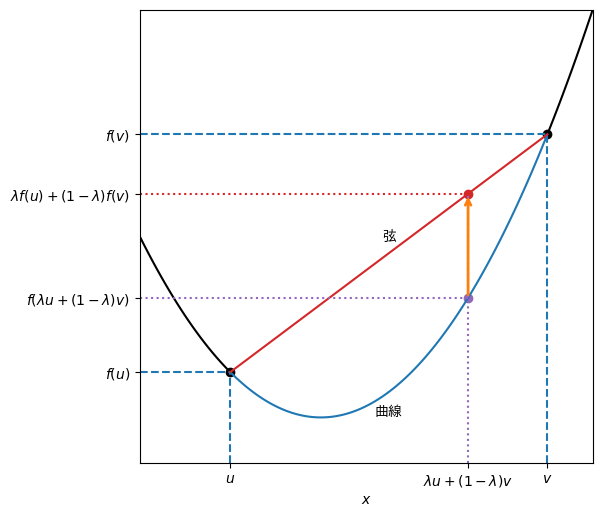

In [126]:
def f(x):
    return 0.25 * (x - 4) ** 2 + 1

u = 2
v = 9
l = 0.25
lx = l*u + (1-l)*v
ly = l*f(u) + (1-l)*f(v)
ymax = 10
xmax = 10

fig, ax = plt.subplots(dpi=100, figsize=(6, 6))

# Plot the curve of f(x).
X = np.linspace(0, u, 100)
ax.plot(X, f(X), 'black')
X = np.linspace(u, v, 100)
ax.plot(X, f(X), 'tab:blue')
X = np.linspace(v, xmax, 100)
ax.plot(X, f(X), 'black')

ax.text((u + v) / 2, f((u + v)/2) - .3, '曲線', ha='center', va='top')

# Plot the points of u and v.
ax.scatter([u, v], [f(u), f(v)], c='black')
ax.axvline(x=u, ymin=0, ymax=f(u) / ymax, ls='--', c='tab:blue')
ax.axhline(y=f(u), xmin=0, xmax=u / xmax, ls="--", c='tab:blue')
ax.axvline(x=v, ymin=0, ymax=f(v) / ymax, ls='--', c='tab:blue')
ax.axhline(y=f(v), xmin=0, xmax=v / xmax, ls="--", c='tab:blue')

# Draw a line between u and v.
ax.plot([u, v], [f(u), f(v)], c='tab:red')
ax.text((u + v) / 2, (f(u) + f(v))/2 + .2, '弦', ha='center', va='bottom')

ax.axvline(x=lx, ymin=0, ymax=ly / ymax, ls=':', c='tab:purple')
ax.axhline(y=f(lx), xmin=0, xmax=lx / xmax, ls=":", c='tab:purple')
ax.scatter([lx], [f(lx)], c='tab:purple')

ax.annotate('', xy=(lx, ly), xytext=(lx, f(lx)), arrowprops=dict(arrowstyle='->', color='tab:orange', lw=2))
ax.axhline(y=ly, xmin=0, xmax=lx / xmax, ls=":", c='tab:red')
ax.scatter([lx], [ly], c='tab:red')

ax.set_xlabel('$x$')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xticks([u, lx, v], ['$u$', r'$\lambda u + (1 - \lambda)v$', '$v$'])
ax.set_yticks([f(u), f(lx), ly, f(v)], ['$f(u)$', r'$f(\lambda u + (1 - \lambda)v)$', r'$\lambda f(u) + (1 - \lambda)f(v)$', '$f(v)$'])
ax.set_aspect('equal')
plt.show()

:::{admonition} 一階微分と凸関数に関する定理
:class: note

関数$f: \mathbb{R}^{d} \longmapsto \mathbb{R}$が一階微分可能であるとする。任意の$\bm{x}, \bm{z} \in \mathbb{R}^{d}$に対して、

$$
\begin{align}
f(\bm{z}) \geq f(\bm{x}) + \nabla f(\bm{x})^\top (\bm{z} - \bm{x})
\end{align}
$$ (eq:first-derivative-convex)

が成り立つとき、$f$は凸関数である。

:::

【証明】任意の$\bm{u}, \bm{v} \in \mathbb{R}^d$と$0 \leq \lambda \leq 1$を満たす任意の$\lambda$を用いて、$\bm{x} = \lambda \bm{u} + (1-\lambda)\bm{v}$と表す。式{eq}`eq:first-derivative-convex`の不等式を$\bm{z} = \bm{u}, \bm{v}$として適用すると、

\begin{align*}
f(\bm{u}) \geq& f(\bm{x}) + \nabla f(\bm{x})^\top (\bm{u} - \bm{x}) = f(\bm{x}) + (1 - \lambda) \nabla f(\bm{x})^\top (\bm{u} - \bm{v}) \\
f(\bm{v}) \geq& f(\bm{x}) + \nabla f(\bm{x})^\top (\bm{v} - \bm{x}) = f(\bm{x}) + \lambda \nabla f(\bm{x})^\top (\bm{v} - \bm{u})
\end{align*}

これらの不等式に基づいて$\lambda f(\bm{u}) + (1 - \lambda)f(\bm{v})$を計算すると、

\begin{align*}
\lambda f(\bm{u}) + (1 - \lambda)f(\bm{v}) &\geq \lambda \{f(\bm{x}) + (1 - \lambda) \nabla f(\bm{x})^\top (\bm{u} - \bm{v})\} + (1 - \lambda) \{f(\bm{x}) + \lambda \nabla f(\bm{x})^\top (\bm{v} - \bm{u})\} \\
&= f(\bm{x}) + \lambda (1 - \lambda) \nabla f(\bm{x})^\top (\bm{u} - \bm{v}) + \lambda (1 - \lambda) \nabla f(\bm{x})^\top (\bm{v} - \bm{u}) \\
&= f(\bm{x}) + \lambda (1 - \lambda) \nabla f(\bm{x})^\top (\bm{u} - \bm{v} + \bm{v} - \bm{u}) \\
&= f(\bm{x}) \\
&= f(\lambda \bm{u} + (1-\lambda)\bm{v})
\end{align*}

である（最終行の変形では$\bm{x}$の$\bm{u}$と$\bm{v}$による表示を代入した）。この不等式は凸関数の定義（式{eq}`eq:convex-definition`）そのものであり、$f$は凸関数であることが示された。なお、ここでは省略するが、この逆を証明して必要十分条件を示すことができる。

この定理は、「関数$f$上の任意の点の接線は$f$の曲線よりも下にある」ことを表現している（厳密には曲線が接線が同じ点で接することがある）。
$f$が1変数関数のとき、ある$\bm{x}, \bm{z}$に対してこの定理が成り立つ様子を図示した。

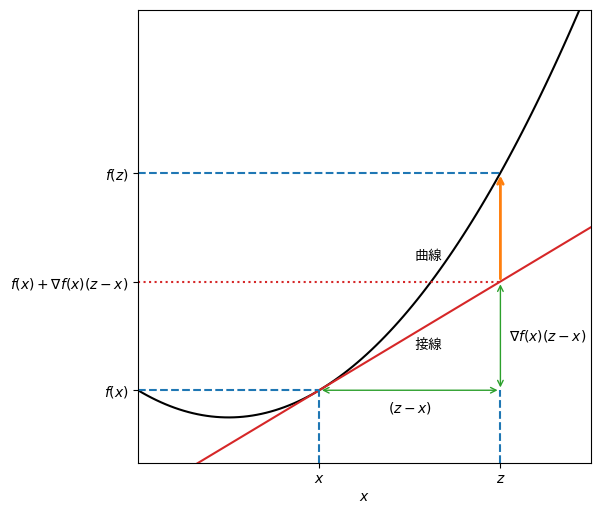

In [147]:
def f(x):
    return 0.15 * (x - 2) ** 2 + 1

def g(x):
    return 2 * 0.15 * (x - 2)

x = 4
z = 8
ymax = 10
xmax = 10
X = np.linspace(0, xmax, 100)
fxz = f(x)+g(x) * (z - x)

fig, ax = plt.subplots(dpi=100, figsize=(6, 6))
ax.plot(X, f(X), 'black')
ax.plot([0, xmax], [f(x) - g(x) * x, f(x) + g(x) * (xmax-x)], c='tab:red')
ax.axvline(x=x, ymin=0, ymax=f(x)/ymax, ls='--', c='tab:blue')
ax.axhline(y=f(x), xmin=0, xmax=x/xmax, ls="--", c='tab:blue')
ax.axvline(x=z, ymin=0, ymax=f(x)/ymax, ls='--', c='tab:blue')
ax.axhline(y=f(z), xmin=0, xmax=z/xmax, ls="--", c='tab:blue')

ax.annotate('', xy=(z, f(x)), xytext=(z, fxz), arrowprops=dict(arrowstyle='<->', color='tab:green'))
ax.axhline(y=fxz, xmin=0, xmax=z/xmax, ls=":", c='tab:red')
ax.annotate('', xy=(x, f(x)), xytext=(z, f(x)), arrowprops=dict(arrowstyle='<->', color='tab:green'))
ax.text((x + z)/2, f(x)-0.2, '$(z-x)$', ha='center', va='top')
ax.text(z + 0.2, (fxz + f(x))/2, r"$\nabla f(x)(z-x)$", ha='left', va='center')

ax.annotate('', xy=(z, f(z)), xytext=(z, fxz), arrowprops=dict(arrowstyle='->', color='tab:orange', lw=2))

xm = x * .4 + z * 0.6
ax.text(xm, f(xm) + 0.5, '曲線', ha='center', va='bottom')
ax.text(xm, f(x) + g(x) * (xm-x) - 0.3, '接線', ha='center', va='top')

ax.set_xlabel('$x$')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xticks([x, z], ['$x$', '$z$'])
ax.set_yticks([f(x), fxz, f(z)], ['$f(x)$', r"$f(x) + \nabla f(x)(z-x)$", '$f(z)$'])
ax.set_aspect('equal')
plt.show()

```{margin} $\nabla^2$と二階微分

$\nabla^2$はラプラシアンかヘッセ行列を表す。$xyz$直交座標空間$\mathbb{R}^3$において、$\nabla^2$を内積$\nabla \cdot \nabla$とすると、ラプラシアンとなる。
\begin{align*}
\nabla \cdot \nabla &= \begin{pmatrix}
\frac{\partial}{\partial x} \\
\frac{\partial}{\partial y} \\
\frac{\partial}{\partial z} \\
\end{pmatrix} \cdot \begin{pmatrix}
\frac{\partial}{\partial x} \\
\frac{\partial}{\partial y} \\
\frac{\partial}{\partial z} \\
\end{pmatrix} \\
&=
\frac{\partial^2}{\partial^2 x} +
\frac{\partial^2}{\partial^2 y} +
\frac{\partial^2}{\partial^2 z}
\end{align*}
これに対し、$\nabla^2$を直積$\nabla \nabla^\top$と考えると、ヘッセ行列となる。
\begin{align*}
\nabla \nabla^\top &= \begin{pmatrix}
\frac{\partial}{\partial x} \\
\frac{\partial}{\partial y} \\
\frac{\partial}{\partial z} \\
\end{pmatrix} \begin{pmatrix}
\frac{\partial}{\partial x} &
\frac{\partial}{\partial y} &
\frac{\partial}{\partial z}
\end{pmatrix} \\
&= \begin{pmatrix}
\frac{\partial^2}{\partial^2 x} & \frac{\partial^2}{\partial x \partial y} & \frac{\partial^2}{\partial x \partial z} \\
\frac{\partial^2}{\partial y \partial x} & \frac{\partial^2}{\partial^2 y} & \frac{\partial^2}{\partial y \partial z} \\
\frac{\partial^2}{\partial z \partial x} & \frac{\partial^2}{\partial z \partial y} & \frac{\partial^2}{\partial^2 z} \\
\end{pmatrix}
\end{align*}

本資料では、$\nabla^2$でヘッセ行列を表すこととする。
```

:::{admonition} 二階微分と凸関数に関する定理
:class: note

関数$f: \mathbb{R}^{d} \longmapsto \mathbb{R}$が二階微分可能であるとする。$f$の二階微分であるヘッセ行列、

\begin{align*}
\nabla^2 f(\bm{x}) = 
\begin{pmatrix}
\frac{\partial^2 f}{\partial^2 x_1} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \dots & \frac{\partial^2 f}{\partial x_1 \partial x_d} \\
\frac{\partial^2 f}{\partial x_2 x_1} & \frac{\partial^2 f}{\partial^2 x_2} & \dots & \frac{\partial^2 f}{\partial x_2 \partial x_d} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_d x_1} & \frac{\partial^2 f}{\partial x_d x_2} & \dots & \frac{\partial^2 f}{\partial^2 x_d} \\
\end{pmatrix} \in \mathbb{R}^{d \times d}
\end{align*}

が半正定値行列であるとき、すなわち、任意のベクトル$\bm{u}$に対して、

$$
\begin{align}
\bm{u}^\top \nabla^2 f(\bm{x}) \bm{u} \geq 0
\end{align}
$$ (eq:second-derivative-convex)

が成り立つとき、$f$は凸関数である。

:::

```{margin} テイラーの定理

関数$f: \mathbb{R} \longmapsto \mathbb{R}$に関するテイラーの定理を紹介する。関数$f$が閉区間$[x, z]$上で$n$回微分可能であるとき、次式が成り立つ。

\begin{align*}
f(z) =& f(x) + f'(x)(z-x) \\
&+ \frac{f''(x)}{2!}(z-x)^2 + \dots \\
&+ \frac{f^{(n-1)}(x)}{(n-1)!}(z-x)^{(n-1)}\\
&+ R_n
\end{align*}

ただし、$R_n$はラグランジュの剰余項で、
\begin{align*}
R_n = \frac{(z-x)^{n}}{n!}f^{(n)}(x + \lambda(z-x))
\end{align*}
を満たす$\lambda\; (0 < \lambda < 1)$が存在する。本資料では、$f$を$\mathbb{R}^d$の値をとる関数に拡張したうえで、$n=2$としてテイラーの定理を適用している。
```

【証明】テイラーの定理より、任意の$\bm{x}, \bm{z} \in \mathbb{R}^{d}$に対して、$0 < \lambda < 1$を満たす$\lambda$が存在し、

\begin{align*}
f(\bm{z}) = f(\bm{x}) + \nabla f(\bm{x})^\top (\bm{z} - \bm{x}) + \frac{1}{2} (\bm{z} - \bm{x})^\top \nabla^2 f(\bm{x} + \lambda (\bm{z} - \bm{x})) (\bm{z} - \bm{x})
\end{align*}

を満たす。仮定より、$f$のヘッセ行列は半正定値行列であることから、上式の第3項は常に非負である（$\bm{u} = \bm{z} - \bm{x}$とおけばよい）。ゆえに、

\begin{align*}
f(\bm{z}) \geq f(\bm{x}) + \nabla f(\bm{x})^\top (\bm{z} - \bm{x})
\end{align*}

であり、一階微分と凸関数に関する定理（式{eq}`eq:first-derivative-convex`）から、$f$は凸関数であることが示された。なお、ここでは省略するが、この逆を証明して必要十分条件を示すことができる。

$f$が1変数関数のとき、式{eq}`eq:second-derivative-convex`の条件は$f''(x) \geq 0$となる。これは、$f$の傾きが単調増加する（厳密には減少しない）ことを表している。

### 目的関数が凸関数であることの証明

さて、ヘッセ行列の半正定値性から凸関数であることを示せることが分かったので、変数を$\bm{x} \to \bm{w}$に、目的関数を$f(\bm{x}) \to \hat{L}_{\mathcal{D}}(\bm{w})$に置換して考察する。式{eq}`eq:gradient`より、目的関数の一階微分は、
\begin{align}
\nabla \hat{L}_{\mathcal{D}}(\bm{w})
= \begin{pmatrix}
\frac{\partial}{\partial w_1} \\
\frac{\partial}{\partial w_2} \\
\vdots \\
\frac{\partial}{\partial w_d} \\
\end{pmatrix} \hat{L}_{\mathcal{D}}(\bm{w})
= \frac{\partial \hat{L}_{\mathcal{D}}(\bm{w})}{\partial \bm{w}}
= 2 \bm{X}^\top (\bm{X}\bm{w} - \bm{y})
= 2 \bm{X}^\top\bm{X}\bm{w} - 2 \bm{X}^\top\bm{y}
\end{align}

さらに、目的関数の二階微分（ヘッセ行列）は、
\begin{align}
\nabla^2 \hat{L}_{\mathcal{D}}(\bm{w})
&= \begin{pmatrix}
\frac{\partial^2}{\partial^2 w_1} & \frac{\partial^2}{\partial w_1 \partial w_2} & \dots & \frac{\partial^2}{\partial w_1 \partial w_d} \\
\frac{\partial^2}{\partial w_2 \partial w_1} & \frac{\partial^2}{\partial^2 w_2} & \dots & \frac{\partial^2}{\partial w_2 \partial w_d} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2}{\partial w_d \partial w_1} & \frac{\partial^2}{\partial w_d \partial w_2} & \dots & \frac{\partial^2}{\partial^2 w_d}
\end{pmatrix} \hat{L}_{\mathcal{D}}(\bm{w}) \\
&= \frac{\partial}{\partial \bm{w}} (2 \bm{X}^\top \bm{X}\bm{w} - 2 \bm{X}^\top \bm{y}) \\
&= 2 (\bm{X}^\top \bm{X})^\top \\
&= 2 \bm{X}^\top \bm{X} && (\because \bm{X}^\top \bm{X} = \bm{X}^\top (\bm{X}^\top)^\top)
\end{align}

ここで、任意のベクトル$\bm{u} \in \mathbb{R}^d$に対して、
\begin{align}
\bm{u}^\top (2 \bm{X}^\top \bm{X}) \bm{u} = 2 \bm{u}^\top \bm{X}^\top \bm{X} \bm{u} = 2(\bm{X}\bm{u})^\top (\bm{X} \bm{u}) = 2 \|\bm{X} \bm{u}\|^2 \geq 0
\end{align}
であるから、目的関数の二階微分$2 \bm{X}^\top \bm{X}$は半正定値行列である。ゆえに、重回帰の目的関数は凸関数である。

## 重回帰の性質

重回帰に関する様々な性質を導出してみよう {cite}`OLS`。重回帰で推定されたパラメータ$\bm{w}$は、式{eq}`eq:gradient`を$\bm{0}$とおいたものであるので、

$$
\begin{align}
\nabla \hat{L}_{\mathcal{D}}(\bm{w}) = -2 \bm{X}^\top \bm{\epsilon} &= \bm{0} \\
\bm{X}^\top \bm{\epsilon} &= \bm{0}
\end{align}
$$ (eq:x_top_epsilon)

この行列・ベクトルの成分を明示すると、

\begin{align}
\begin{pmatrix}
X_{1,1} & X_{2,1} & \dots & X_{N,1} \\
X_{1,2} & X_{2,2} & \dots & X_{N,2} \\
\vdots & \vdots & \ddots & \vdots \\
X_{1,d} & X_{2,d} & \dots & X_{N,d}
\end{pmatrix}
\begin{pmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_N
\end{pmatrix}
=
\begin{pmatrix}
\sum_{i=1}^N X_{i,1} \epsilon_i \\
\sum_{i=1}^N X_{i,2} \epsilon_i \\
\vdots \\
\sum_{i=1}^N X_{i,d} \epsilon_i
\end{pmatrix}
=
\begin{pmatrix}
0 \\ 0 \\ \vdots \\ 0
\end{pmatrix}
\end{align}

ゆえに、任意の整数$j \in \{1, 2, \dots, d\}$に関して、

$$
\sum_{i=1}^N X_{i,j} \epsilon_i = 0
$$ (eq:epsilon_property)

これは、$\bm{w}$を求めるときに、式{eq}`eq:mra-grad-wj`の2行目を全ての$j$に対して$0$としたことからも、明らかである。

ここで、バイアス項（切片）に対応するパラメータを持たせるため、$\bm{X}$の先頭列の要素はすべて$1$と仮定する。

$$
\begin{array}{cc}
X_{i,1} = 1 & (i \in \{1, 2, \dots, N\})
\end{array}
$$ (eq:first_column_one)

念のため、$\bm{X}$と$\bm{X}^\top$を明示的に書くと、

\begin{align}
\bm{X} = 
\begin{pmatrix}
1 & X_{1,2} & \dots & X_{1,d} \\
1 & X_{2,2} & \dots & X_{2,d} \\
\vdots & \vdots & \ddots & \vdots \\
1 & X_{1,N} & \dots & X_{N,d}
\end{pmatrix}, 
\bm{X}^\top = 
\begin{pmatrix}
1 & 1 & \dots & 1 \\
X_{1,2} & X_{2,2} & \dots & X_{N,2} \\
\vdots & \vdots & \ddots & \vdots \\
X_{1,d} & X_{2,d} & \dots & X_{N,d}
\end{pmatrix}
\end{align}

これにより、$w_1$がバイアス項に対応するパラメータとなる。ここから、重回帰の様々な性質を導出してみよう。なお、バイアス項に対応させる列は先頭である必要はなく、その他の場所でも以降の議論の一般性は失われない。

### 残差の和および平均は$0$

$j=1$として式{eq}`eq:epsilon_property`に式{eq}`eq:first_column_one`を代入すると、

$$
\sum_{i=1}^N X_{i,1} \epsilon_i = \sum_{i=1}^N \epsilon_i = 0
$$ (eq:sum_epsilon_zero-mra)

ゆえに、残差の和および平均は$0$である。

### 目的変数の推定値$\hat{y}$の平均値は観測値$y$の平均に等しい

残差の定義$\bm{\epsilon} = \bm{y} - \hat{\bm{y}}$を明示的に書くと、

\begin{align}
\begin{pmatrix}
\epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_N
\end{pmatrix} =
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_N
\end{pmatrix}
-
\begin{pmatrix}
\hat{y}_1 \\ \hat{y}_2 \\ \vdots \\ \hat{y}_N
\end{pmatrix}
\end{align}

両辺の各要素の和をとると、

\begin{align}
\sum_{i=1}^N \epsilon_i = \sum_{i=1}^N y_i - \sum_{i=1}^N \hat{y}_i
\end{align}

ここで、式{eq}`eq:sum_epsilon_zero-mra`より左辺は$0$であるから、

\begin{align}
\sum_{i=1}^N y_i &= \sum_{i=1}^N \hat{y}_i \\
\frac{1}{N}\sum_{i=1}^N y_i &= \frac{1}{N}\sum_{i=1}^N \hat{y}_i \\
\overline{y} &= \overline{\hat{y}}
\end{align}

ゆえに、目的変数の推定値$\hat{y}$の平均値は観測値$y$の平均に等しい。

### 観測データの重心は回帰平面上に存在する

説明変数の平均ベクトル$\overline{\bm{x}}$、

\begin{align}
\overline{\bm{x}} = \frac{1}{N} \sum_{i=1}^N \bm{x}_i
\end{align}

に対して、目的変数の推定値を計算すると、

\begin{align}
\overline{\bm{x}}^\top \bm{w}
&= \frac{1}{N} \sum_{i=1}^N \bm{x}_i^\top \bm{w} \\
&= \frac{1}{N} \sum_{i=1}^N \hat{y}_i \\
&= \overline{\hat{y}} = \overline{y}
\end{align}

目的変数の平均$\overline{y}$が得られる。ゆえに、観測データの重心は回帰平面上に存在する。

### 各説明変数と残差には相関がない

$j$番目の説明変数$\bm{X}_{:,j}$を確率変数と見なし、$\mathcal{X}_j$と書くことにする。
任意の説明変数$\mathcal{X}_j$と残差$\mathcal{E}$の共分散を計算する。残差の平均は$\overline{\epsilon}=0$であること、式{eq}`eq:epsilon_property`と式{eq}`eq:sum_epsilon_zero-mra`を利用すると、

\begin{align}
\mathrm{Cov}[\mathcal{X}_j, \mathcal{E}] &= \frac{1}{N}\sum_{i=1}^N (X_{i,j} - \overline{\bm{X}_{:,j}}) (\epsilon_i - \overline{\epsilon}) \\
&= \frac{1}{N}\sum_{i=1}^N (X_{i,j} - \overline{\bm{X}_{:,j}}) \epsilon_i \\
&= \frac{1}{N}\sum_{i=1}^N X_{i,j}  \epsilon_i - \frac{1}{N}\sum_{i=1}^N  \overline{\bm{X}_{:,j}} \epsilon_i \\
&= \frac{1}{N}\underbrace{\sum_{i=1}^N X_{i,j} \epsilon_i}_{0} - \frac{\overline{\bm{X}_{:,j}}}{N}\underbrace{\sum_{i=1}^N  \epsilon_i}_{0} \\
&= 0
\end{align}

### 目的変数の推定値と残差には相関がない

目的変数の推定値$\hat{\mathcal{Y}}$と残差$\mathcal{E}$の共分散を計算する。残差の平均は$\overline{\epsilon}=0$であること、式{eq}`eq:x_top_epsilon`と式{eq}`eq:sum_epsilon_zero-mra`を利用すると、

$$
\begin{align}
\mathrm{Cov}[\hat{\mathcal{Y}},\mathcal{E}] &= \frac{1}{N}\sum_{i=1}^N (\hat{y}_i - \overline{\hat{y}}) (\epsilon_i - \overline{\epsilon}) \\
&= \frac{1}{N}\sum_{i=1}^N (\hat{y}_i - \overline{\hat{y}}) \epsilon_i \\
&= \frac{1}{N}\sum_{i=1}^N \hat{y}_i \epsilon_i - \frac{1}{N}\sum_{i=1}^N \overline{\hat{y}} \epsilon_i \\
&= \frac{1}{N}\sum_{i=1}^N \hat{y}_i \epsilon_i - \frac{\overline{\hat{y}}}{N}\underbrace{\sum_{i=1}^N \epsilon_i}_{0} \\
&= \frac{1}{N}\sum_{i=1}^N \hat{y}_i \epsilon_i \\
&= \frac{1}{N}\bm{\hat{y}}^\top \bm{\epsilon} \\
&= \frac{1}{N}(\bm{X} \bm{w})^\top \bm{\epsilon} \\
&= \frac{1}{N}\bm{w}^\top \underbrace{\bm{X}^\top \bm{\epsilon}}_{0} \\
&= 0
\end{align}
$$ (eq:cov_hat_y_and_epsilon-mra)

であるから、$\mathrm{Cov}[\hat{\mathcal{Y}},\mathcal{E}] = 0$が言える。すなわち、目的変数の推定値と残差の共分散が0になることから、目的変数の推定値と残差は無相関（無関係）であることが分かる。

## 決定係数

目的変数の観測値の分散$\mathrm{Var}[\mathcal{Y}]$は目的変数の推定値の分散$\mathrm{Var}[\hat{\mathcal{Y}}]$と残差の分散$\mathrm{Var}[\mathcal{E}]$の和で表されることを示す。

\begin{align}
\mathrm{Var}[\mathcal{Y}] &= \frac{1}{N} \sum_{i=1}^N (y_i - \overline{y})^2 \\
&= \frac{1}{N} \sum_{i=1}^N \{(\hat{y}_i + \epsilon_i) - \overline{y}\}^2 \\
&= \frac{1}{N} \sum_{i=1}^N \{(\hat{y}_i  - \overline{y}) + \epsilon_i\}^2 \\
&= \frac{1}{N} \sum_{i=1}^N (\hat{y}_i  - \overline{y})^2 + \frac{1}{N} \sum_{i=1}^N 2 (\hat{y}_i  - \overline{y}) \epsilon_i + \frac{1}{N} \sum_{i=1}^N \epsilon_i^2 \\
&= \mathrm{Var}[\hat{\mathcal{Y}}] + 2 \cdot \frac{1}{N} \underbrace{\sum_{i=1}^N \hat{y}_i \epsilon_i}_{0} - 2\overline{y} \cdot \frac{1}{N} \underbrace{\sum_{i=1}^N \epsilon_i}_{0} + \mathrm{Var}[\mathcal{E}] \\
&= \mathrm{Var}[\hat{\mathcal{Y}}] + \mathrm{Var}[\mathcal{E}]
\end{align}

なお、以上の式変形における最後から2行目において、第２項は式{eq}`eq:cov_hat_y_and_epsilon-mra`の導出結果、第３項は式{eq}`eq:sum_epsilon_zero-mra`より$0$であることを利用した。

したがって、単回帰のときと同様に、

+ **全変動**: 目的変数の観測値の分散$\mathrm{Var}[\mathcal{Y}]$（データの変動）
+ **回帰変動**: 目的変数の推定値の分散$\mathrm{Var}[\hat{\mathcal{Y}}]$（モデルの変動）
+ **残差変動**: 残差の分散$\mathrm{Var}[\mathcal{E}]$（モデルが説明しきれなかった変動）

すると、先ほどの式は「**全変動は回帰変動と残差変動の和で表される**」という関係を表している。

データの全変動のうち、回帰によって表現できた回帰変動の割合を**決定係数**とよび、次式で定義する。

:::{admonition} 決定係数
:class: important

\begin{align}
R^2 = \frac{\mathrm{Var}[\hat{\mathcal{Y}}]}{\mathrm{Var}[\mathcal{Y}]} = \frac{\mathrm{Var}[\mathcal{Y}] - \mathrm{Var}[\mathcal{E}]}{\mathrm{Var}[\mathcal{Y}]} = 1 - \frac{\mathrm{Var}[\mathcal{E}]}{\mathrm{Var}[\mathcal{Y}]}
\end{align}

:::

決定係数は$[0,1]$の範囲の値ととり、データがモデル（単回帰の場合は直線）によく当てはまるときは$1$に近くなる。

## 重回帰の実施例

冒頭の最高気温とアイスクリーム・シャーベットの支出額のデータに対して、単回帰を行う例を示す。まず、説明変数（最高気温）を`X`、目的変数（支出額）を`Y`に格納する。

In [5]:
def plot_graph(X, Y, x, y):
    fig, ax = plt.subplots(dpi=100)
    ax.set_title('最高気温とアイスクリーム・シャーベットの支出額')
    ax.set_xlabel('最高気温の月平均（℃）')
    ax.set_ylabel('支出額（円）')
    ax.set_xlim(0, 35)
    ax.set_ylim(-250, 2000)
    ax.grid()
    ax.scatter(X, Y, marker='.')
    ax.plot(x, y, 'r')

X = np.array([
     9.1, 11.2, 12.3, 18.9, 22.2, 26. , 30.9, 31.2, 28.8, 23. , 18.3,
    11.1,  8.3,  9.1, 12.5, 18.5, 23.6, 24.8, 30.1, 33.1, 29.8, 23. ,
    16.3, 11.2,  9.6, 10.3, 16.4, 19.2, 24.1, 26.5, 31.4, 33.2, 28.8,
    23. , 17.4, 12.1, 10.6,  9.8, 14.5, 19.6, 24.7, 26.9, 30.5, 31.2,
    26.9, 23. , 17.4, 11. , 10.4, 10.4, 15.5, 19.3, 26.4, 26.4, 30.1,
    30.5, 26.4, 22.7, 17.8, 13.4, 10.6, 12.2, 14.9, 20.3, 25.2, 26.3,
    29.7, 31.6, 27.7, 22.6, 15.5, 13.8, 10.8, 12.1, 13.4, 19.9, 25.1,
    26.4, 31.8, 30.4, 26.8, 20.1, 16.6, 11.1,  9.4, 10.1, 16.9, 22.1,
    24.6, 26.6, 32.7, 32.5, 26.6, 23. , 17.7, 12.1, 10.3, 11.6, 15.4,
    19. , 25.3, 25.8, 27.5, 32.8, 29.4, 23.3, 17.7, 12.6, 11.1, 13.3,
    16. , 18.2, 24. , 27.5, 27.7, 34.1, 28.1, 21.4, 18.6, 12.3])

Y = np.array([
    463.,  360.,  380.,  584.,  763.,  886., 1168., 1325.,  847.,
    542.,  441.,  499.,  363.,  327.,  414.,  545.,  726.,  847.,
   1122., 1355.,  916.,  571.,  377.,  465.,  377.,  362.,  518.,
    683.,  838., 1012., 1267., 1464., 1000.,  629.,  448.,  466.,
    404.,  343.,  493.,  575.,  921., 1019., 1149., 1303.,  805.,
    739.,  587.,  561.,  486.,  470.,  564.,  609.,  899.,  946.,
   1295., 1325.,  760.,  667.,  564.,  633.,  478.,  450.,  567.,
    611.,  947.,  962., 1309., 1307.,  930.,  668.,  496.,  650.,
    506.,  423.,  531.,  672.,  871.,  986., 1368., 1319.,  924.,
    716.,  651.,  708.,  609.,  535.,  717.,  890., 1054., 1077.,
   1425., 1378.,  900.,  725.,  554.,  542.,  561.,  459.,  604.,
    745., 1105.,  973., 1263., 1533., 1044.,  821.,  621.,  601.,
    549.,  572.,  711.,  819., 1141., 1350., 1285., 1643., 1133.,
    784.,  682.,  587.])

### numpy.polynomialを用いる例

[numpy.polynomial](https://numpy.org/doc/stable/reference/routines.polynomials.html)を用いると、線形回帰モデルのパラメータを求めることができる。多項式近似の次元数を３番目の引数に指定する。以下は2次関数にフィッティングする例である。

In [6]:
from numpy.polynomial import Polynomial

W = Polynomial.fit(X, Y, 2)
W.convert()

Polynomial([635.74825774, -33.14302425,   1.73160796], domain=[-1.,  1.], window=[-1.,  1.])

多項式近似の係数を$0$次、$1$次、…の順で並べて表示する。

In [7]:
W.convert().coef

array([635.74825774, -33.14302425,   1.73160796])

$0$から$35$までに等間隔に配置した$100$個の数値`x`に対して、目的変数の推定値`y_hat`を求め、回帰曲線を描画する。

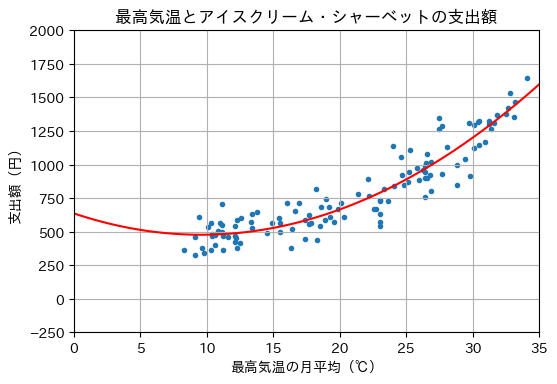

In [8]:
x = np.linspace(0, 35, 100)
y_hat = W(x)
plot_graph(X, Y, x, y_hat)

続いて、3次関数にフィッティングしてみる。

In [9]:
W = Polynomial.fit(X, Y, 3)
W.convert().coef

array([ 2.64628814e+02,  2.92887138e+01, -1.44685888e+00,  5.01164586e-02])

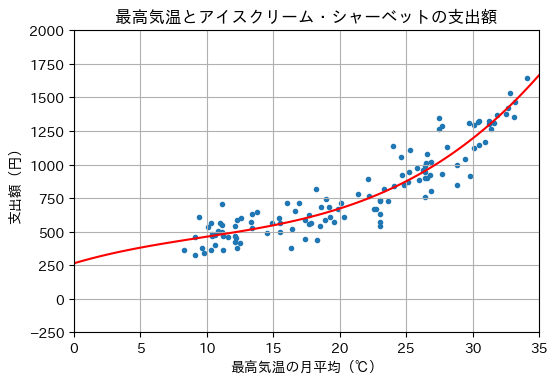

In [10]:
x = np.linspace(0, 35, 100)
y_hat = W(x)
plot_graph(X, Y, x, y_hat)

さらに、4次関数にフィッティングした結果を示す。

In [11]:
W = Polynomial.fit(X, Y, 4)
W.convert().coef

array([-3.47044444e+02,  1.67566320e+02, -1.23937689e+01,  4.12591380e-01,
       -4.27358629e-03])

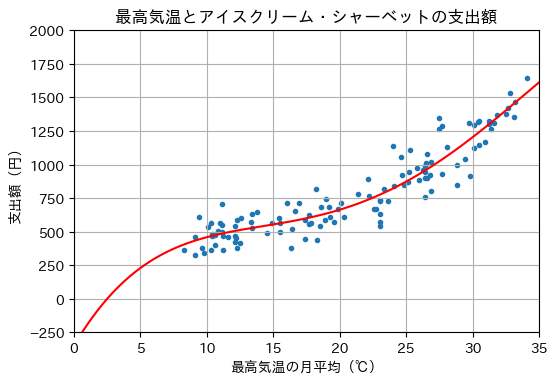

In [12]:
x = np.linspace(0, 35, 100)
y_hat = W(x)
plot_graph(X, Y, x, y_hat)

### sklearn.linear_model.LinearRegressionを用いる例

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

[sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)クラスを用いても、線形回帰を容易に実行できる。訓練データにフィッティングさせるには、[fit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit)関数を呼び出せばよいが、説明変数のデータとして、事例数を行数、目的変数の数を列数とした行列形式で与えることになっているので、`X`の形状を変更する。以下に、3次関数にフィッティングする例を示す。

In [14]:
reg = make_pipeline(PolynomialFeatures(3), LinearRegression())
reg.fit(X.reshape(-1, 1), Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

回帰直線の係数（傾き）を表示する。

In [15]:
reg[1].coef_

array([ 0.        , 29.28871381, -1.44685888,  0.05011646])

回帰直線の切片を表示する。

In [16]:
reg[1].intercept_

264.628814101544

決定係数を求めるため、[score](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)関数を呼び出す。

In [17]:
reg.score(X.reshape(-1, 1), Y)

0.8784609747360882

$0$から$35$までに等間隔に配置した$100$個の数値`x`に対して、目的変数の推定値`y_hat`を求めるため、[predict](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict)関数を呼び出し、回帰曲線を描画する。

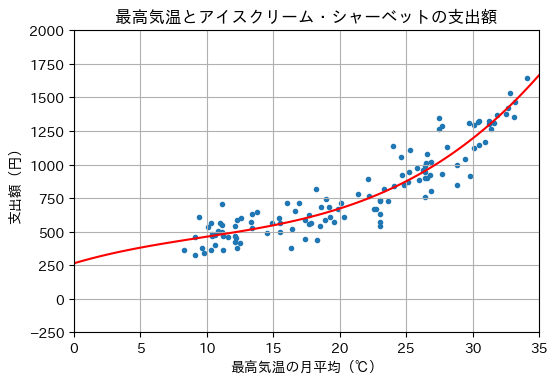

In [18]:
x = np.linspace(0, 35, 100)
y_hat = reg.predict(x.reshape(-1, 1))
plot_graph(X, Y, x, y_hat)

## 確認問題

データ$\mathcal{D}_s$に対して多項式のフィッティングを行いたい。以下の処理を行うプログラムを作成せよ。

In [19]:
D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])

なお、NumPy, SciPy, scikit-learn, statsmodel等のライブラリには回帰分析を行う便利な関数として以下のようなものがあるが、ここでは使わずに講義中で説明した式をプログラムとして表現すること。

+ [np.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html), [np.polynomial.polynomial.Polynomial.fit](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html#numpy.polynomial.polynomial.Polynomial.fit)
+ [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html), [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html), [scipy.stats.linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)
+ [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
+ [statsmodels.regression.linear_model.OLS](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS)

**(1) 行列による1次関数のパラメータ推定**

$y = w_0 + w_1 x$とおき、学習データ$\mathcal{D}_s$上の平均二乗残差を最小にする$\bm{w} = \begin{pmatrix}
w_0 \\
w_1
\end{pmatrix}$を行列演算により求めよ。

**(2) ２次関数による重回帰**

$y = w_0 + w_1 x + w_2 x^2$とおき、重回帰により平均二乗残差を最小にする$\bm{w} = \begin{pmatrix}
w_0 \\
w_1 \\
w_2
\end{pmatrix}$を求めよ。

**(3) 回帰曲線の描画**

回帰で求めた2次関数をデータ点とともにグラフに描け。

**(4) 決定係数**

回帰で得られた2次関数の決定係数（$R^2$）を求めよ。

**(5) 3次関数による重回帰**

$y = w_0 + w_1 x + w_2 x^2 + w_3 x^3$とおき、重回帰により平均二乗残差を最小にする$\bm{w} = \begin{pmatrix}
w_0 \\
w_1 \\
w_2 \\
w_3
\end{pmatrix}$を求めよ。

**(6) 回帰曲線の描画**

回帰で求めた3次関数をデータ点とともにグラフに描け

**(7) 決定係数**

回帰で求めた3次関数の決定係数（$R^2$）を求めよ

---

[機械学習帳](https://chokkan.github.io/mlnote/) © Copyright 2020-2022 by [岡崎 直観 (Naoaki Okazaki)](https://www.chokkan.org/). この作品は<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">クリエイティブ・コモンズ 表示 - 非営利 - 改変禁止 4.0 国際 ライセンス</a>の下に提供されています。 <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="クリエイティブ・コモンズ・ライセンス" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/80x15.png" /></a>　ただし、作品中のコードセル部分は<a rel="license" href="https://opensource.org/licenses/MIT">MITライセンス</a>の下に提供されています。